In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [25]:
# units
cm = 10e-2
mm = 10e-3
um = 10e-6
nm = 10e-9

In [26]:
def intensity(a, l, r, x):
    theta = (np.pi * a * x) / (l * r)
    return (np.sinc(theta))**2

In [27]:
d = 1
w = 20 * um
h = 20 * um
l = 663 * nm
I0 = 1000

x = 4 * cm
y = 4 * cm

dx = 1000
dy = 1000
slitdim = 20

In [28]:
Xscreen = (x/dx)*(np.arange(dx)-dx//2) 
Yscreen = (y/dy)*(np.arange(dy)-dy//2)

X, Y = np.meshgrid(Xscreen, Yscreen)

Z = np.ones((dy,dx))*d

In [29]:
Xslit = np.linspace(-w/2, w/2, slitdim)
Yslit = np.linspace(-h/2, h/2, slitdim)

In [30]:
def propogate(w, h, l, d, X, Y, dx, dy):
    M = np.zeros((dx, dy))
    for j in Yslit:
        for i in Xslit:
            Ix = intensity(w, l, d, X)            
            Iy = intensity(h, l, d, Y)
            M += I0 * (Ix) * (Iy)
    M = np.abs(M)
    return M

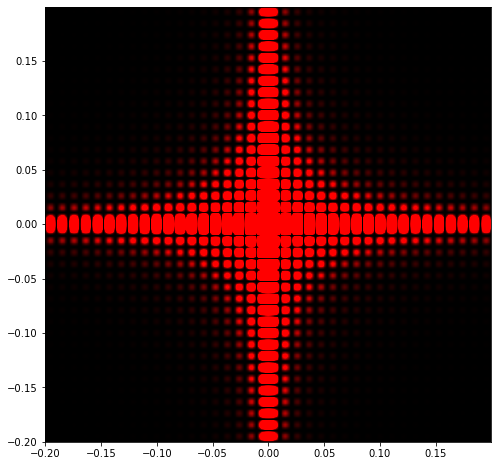

In [32]:
fig, ax = plt.subplots(figsize=(8,8))

M = propogate(w, h, l, d, X, Y, dx, dy)
ax.set_aspect('auto')
plt.pcolormesh(X, Y, M, cmap=mpl.colors.LinearSegmentedColormap.from_list("", ['black', 'red']), vmin=0, vmax=10)
        
plt.show()